In [2]:
# !pip install pandas numpy matplotlib seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:


# Read the CSV file and only import the first 7 columns
df = pd.read_csv("C://Users//siddd//OneDrive//Desktop//srh//master_Thesis//analytics//Big_df.csv", usecols=range(7))

print(df.head())
print(df.shape)

                                             Heading                  Date  \
0  European Super League: Players and fans condem...  2021-04-20T10:32:23Z   
1  Annika Sorenstam: 10-time major winner to make...  2021-02-10T11:03:14Z   
2  Two teenagers charged for allegedly killing 14...  2021-10-12T16:20:31Z   
3  Monday Night Football: Miami Dolphins defeat t...  2021-12-28T10:51:38Z   
4  Germany's far-right AfD becomes first party to...  2021-03-04T10:02:54Z   

                                                 URL  \
0  https://www.cnn.com/2021/04/20/football/liverp...   
1  https://www.cnn.com/2021/02/10/golf/annika-sor...   
2  https://www.cnn.com/2021/10/12/australia/teena...   
3  https://www.cnn.com/2021/12/28/sport/nfl-mnf-m...   
4  https://www.cnn.com/2021/03/04/europe/germany-...   

                                             Content Identifier Economic  \
0   (CNN)Players and fans of Liverpool and Leeds ...        CNN   Centre   
1   (CNN)After 13 years away from the LPGA

In [5]:
df.shape

(9310, 7)

In [6]:
import pandas as pd

# Assuming df is your DataFrame already loaded

# Define the keywords and their corresponding labels
labels = {
    'blitzindia': ('Right', 'Liberal'),
    'cnn': ('Centre', 'Centre'),
    'economictimes': ('Right', 'Centre'),
    'firstpost': ('Centre', 'Liberal'),
    'indianexpress': ('Left', 'Centre'),
    'ndtv': ('Left', 'Liberal'),
    'swarajya': ('Right', 'Authoritarian'),
    'thenewindianexpress': ('Centre', 'Centre'),
}

# Function to determine the labels based on keywords
def determine_labels(identifier):
    if isinstance(identifier, str):
        identifier = identifier.lower()
        for keyword, label_pair in labels.items():
            if keyword in identifier:
                return label_pair
    return ('', '')  # Return empty strings if no match found

# Apply the function to the 'Identifier' column and split the results into two new columns
df[['Economic', 'Social']] = df['Identifier'].apply(determine_labels).apply(pd.Series)

# Optionally print the DataFrame to confirm the new columns
print(df[['Identifier', 'Economic', 'Social']].head())

  Identifier Economic  Social
0        CNN   Centre  Centre
1        CNN   Centre  Centre
2        CNN   Centre  Centre
3        CNN   Centre  Centre
4        CNN   Centre  Centre


In [7]:
df.shape

(9310, 7)

In [8]:
# null values

In [9]:
print(df.isnull().sum())

Heading       0
Date          6
URL           0
Content       9
Identifier    1
Economic      0
Social        0
dtype: int64


In [10]:
df.dropna(inplace=True)

In [11]:
print(df.isnull().sum())

Heading       0
Date          0
URL           0
Content       0
Identifier    0
Economic      0
Social        0
dtype: int64


In [12]:
# date column

In [13]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')



In [14]:
df['Date'] = pd.to_datetime(df['Date'])

# Check data types and look for any anomalies
print(df.dtypes)

Heading                    object
Date          datetime64[ns, UTC]
URL                        object
Content                    object
Identifier                 object
Economic                   object
Social                     object
dtype: object


In [15]:
df['Date'].isna().sum()

np.int64(8300)

In [16]:
# correcting labeling

In [17]:
# datatype categorical

In [18]:
# Print unique values and their counts
print(df['Economic'].value_counts())




Economic
Left      3826
Centre    3348
Right     2081
            45
Name: count, dtype: int64


In [19]:
# handling categorical data

In [20]:
# Economic

In [21]:
import pandas as pd

# Assuming df is your DataFrame

# Convert 'centre' to 'Centre', accounting for any capitalization variations
df['Economic'] = df['Economic'].replace(to_replace=r'(?i)^centre$', value='Centre', regex=True)

# Check the unique values to ensure the replacement was successful
print(df['Economic'].unique())


['Centre' 'Left' 'Right' '']


In [22]:
# Convert 'centre' to 'Centre', accounting for any capitalization variations
df['Social'] = df['Social'].replace(to_replace=r'(?i)^centre$', value='Centre', regex=True)

# Check the unique values to ensure the replacement was successful
print(df['Social'].unique())

['Centre' 'Liberal' 'Authoritarian' '']


In [23]:
def replace_invalid(row_index, column_name, valid_categories):
    # Check the current value is not one of the valid categories
    current_value = df.loc[row_index, column_name]
    if current_value not in valid_categories:
        # Ensure we're not at the boundaries of the DataFrame
        if row_index > 0 and row_index < len(df) - 1:
            # Get the values from the previous and next rows
            prev_value = df.loc[row_index - 1, column_name]
            next_value = df.loc[row_index + 1, column_name]

            # Check if both are valid and the same, then replace
            if prev_value == next_value and prev_value in valid_categories:
                df.loc[row_index, column_name] = prev_value
            else:
                # If not, do not propagate potentially incorrect values; instead set to a default or leave as is
                print(f"No valid match found at row {row_index}, leaving as {current_value}")

# Apply the refined logic to both 'Economic' and 'Social' columns
for idx in df.index:
    replace_invalid(idx, 'Economic', ['Left', 'Right', 'Centre'])
    replace_invalid(idx, 'Social', ['Liberal', 'Authoritarian', 'Centre'])


In [24]:
print(df['Social'].unique())

['Centre' 'Liberal' 'Authoritarian']


In [25]:
# Convert 'economic' and 'social' columns to categorical types
df['Economic'] = df['Economic'].astype('category')
df['Social'] = df['Social'].astype('category')

# Verify the conversion
print(df.dtypes)


Heading                    object
Date          datetime64[ns, UTC]
URL                        object
Content                    object
Identifier                 object
Economic                 category
Social                   category
dtype: object


In [26]:
# Creating target column (ideology)

In [27]:
def create_ideology(economic, social):
    # Mapping for economic values
    economic_map = {'Left': 'L', 'Centre': 'C', 'Right': 'R'}
    # Mapping for social values
    social_map = {'Liberal': 'L', 'Authoritarian': 'A', 'Centre': 'C'}

    # Get the mapped values
    econ_code = economic_map.get(economic, '')
    social_code = social_map.get(social, '')

    # Return the combined code
    return econ_code + social_code


In [28]:
# Apply the function to create a new 'Ideology' column
df['Ideology'] = df.apply(lambda x: create_ideology(x['Economic'], x['Social']), axis=1)
df.head()

,Heading,Date,URL,Content,Identifier,Economic,Social,Ideology
0,European Super League: Players and fans condem...,2021-04-20 10:32:23+00:00,https://www.cnn.com/2021/04/20/football/liverp...,(CNN)Players and fans of Liverpool and Leeds ...,CNN,Centre,Centre,CC
1,Annika Sorenstam: 10-time major winner to make...,2021-02-10 11:03:14+00:00,https://www.cnn.com/2021/02/10/golf/annika-sor...,"(CNN)After 13 years away from the LPGA Tour, ...",CNN,Centre,Centre,CC
2,Two teenagers charged for allegedly killing 14...,2021-10-12 16:20:31+00:00,https://www.cnn.com/2021/10/12/australia/teena...,(CNN)Two teenage boys have been charged after...,CNN,Centre,Centre,CC
3,Monday Night Football: Miami Dolphins defeat t...,2021-12-28 10:51:38+00:00,https://www.cnn.com/2021/12/28/sport/nfl-mnf-m...,(CNN)The Miami Dolphins' hot streak continued...,CNN,Centre,Centre,CC
4,Germany's far-right AfD becomes first party to...,2021-03-04 10:02:54+00:00,https://www.cnn.com/2021/03/04/europe/germany-...,BerlinGermany's BfV domestic intelligence serv...,CNN,Centre,Centre,CC


In [29]:
print(df['Ideology'].unique())

['CC' 'CL' 'LC' 'LL' 'RL' 'RC' 'RA']


In [30]:
# Assuming 'df' is your DataFrame
df.to_csv("C://Users//siddd//OneDrive//Desktop//srh//master_Thesis//Nlp//master_df_cleaned.csv", index=False)


In [31]:
# visualisation

In [32]:
# line graphs

In [33]:
sns.set(style="whitegrid")

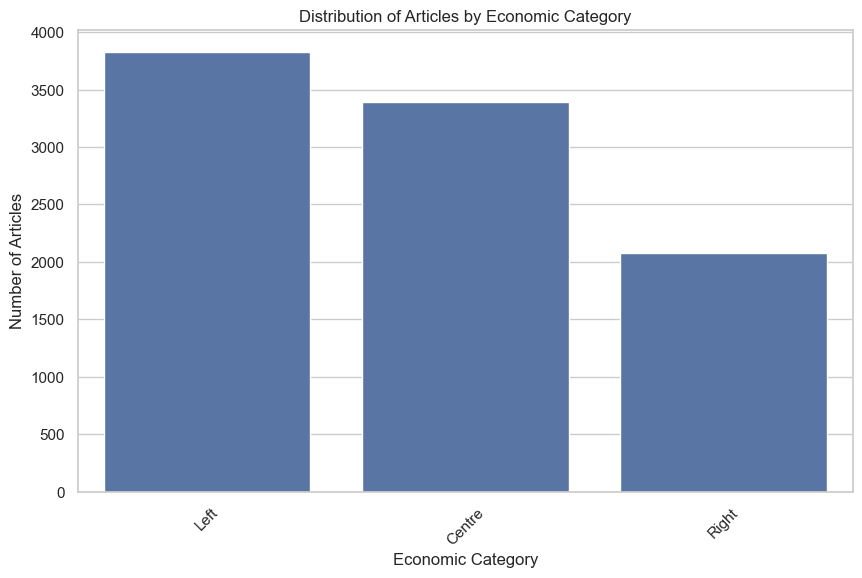

In [34]:
# Create a bar chart for the 'Economic' category
plt.figure(figsize=(10, 6))
sns.countplot(x='Economic', data=df, order=df['Economic'].value_counts().index)
plt.title('Distribution of Articles by Economic Category')
plt.xlabel('Economic Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)  # Adjust rotation if necessary for better label visibility
plt.show()


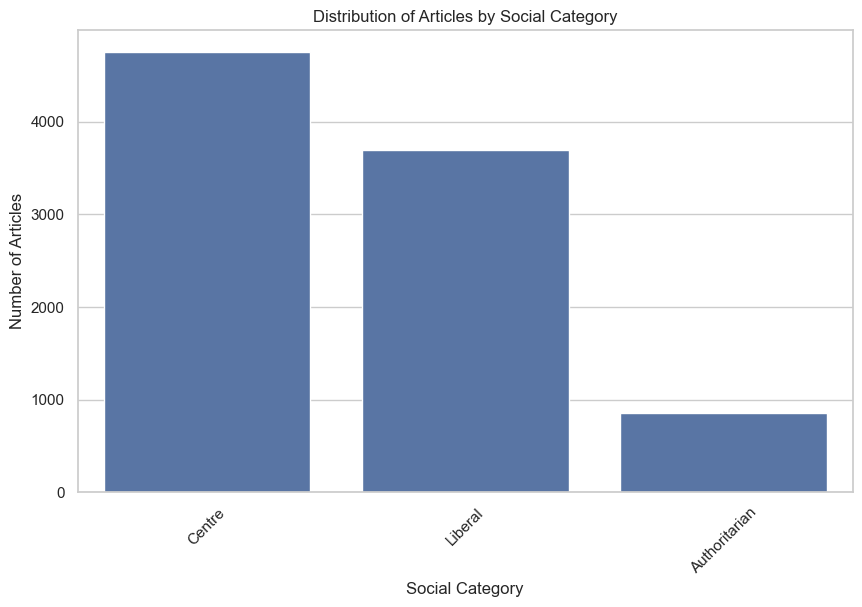

In [35]:
# Create a bar chart for the 'Social' category
plt.figure(figsize=(10, 6))
sns.countplot(x='Social', data=df, order=df['Social'].value_counts().index)
plt.title('Distribution of Articles by Social Category')
plt.xlabel('Social Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)  # Adjust rotation if necessary for better label visibility
plt.show()


In [36]:
# heatmap

In [37]:
# Create a pivot table with counts of combinations
pivot_table = pd.crosstab(df['Economic'], df['Social'])

# Display the pivot table
print(pivot_table)


Social    Authoritarian  Centre  Liberal
Economic                                
Centre                0    1542     1850
Left                  0    2351     1476
Right               856     856      369


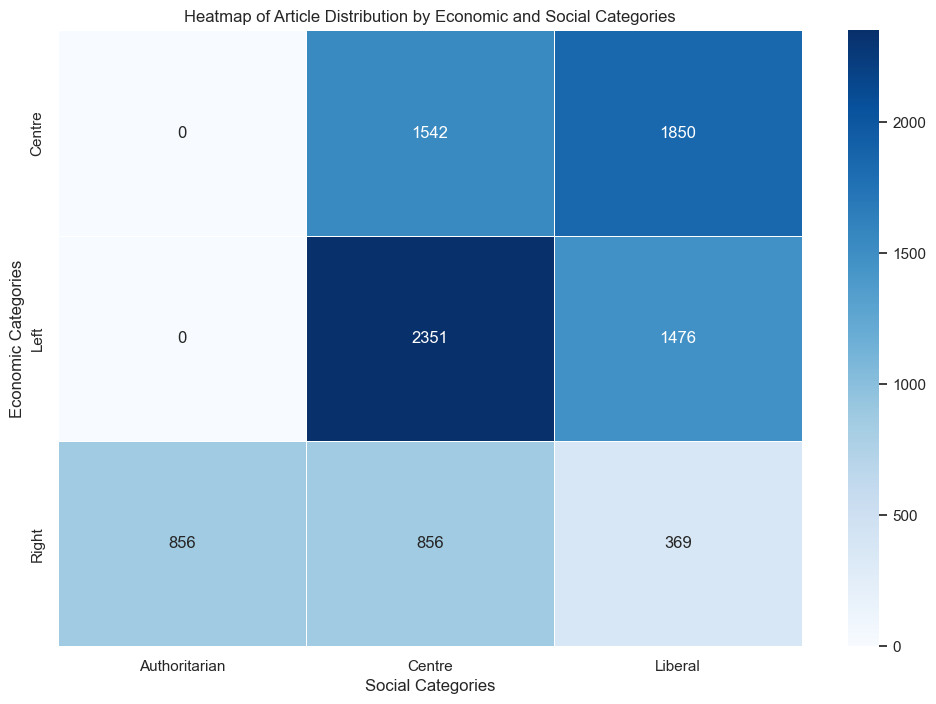

In [38]:
# Create a heatmap from the pivot table
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Heatmap of Article Distribution by Economic and Social Categories')
plt.xlabel('Social Categories')
plt.ylabel('Economic Categories')
plt.show()


In [39]:
# !pip install wordcloud



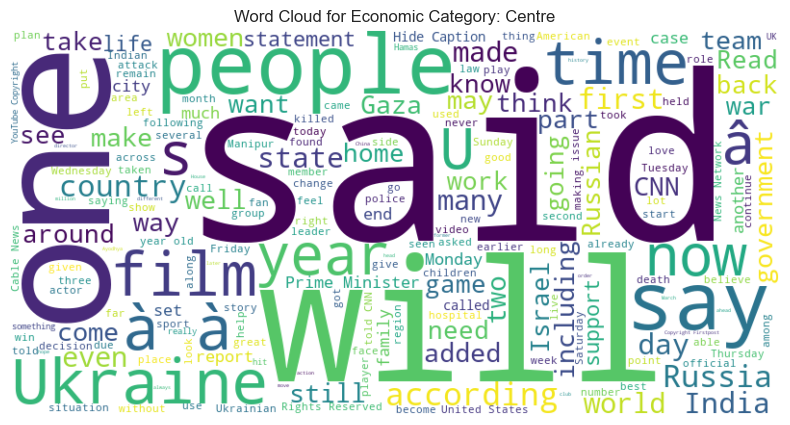

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame to only include rows where 'Economic' is 'Centre'
centre_text = df[df['Economic'] == 'Centre']['Content'].str.cat(sep=' ')

# Create a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(centre_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Economic Category: Centre')
plt.show()




In [41]:
df.head()

,Heading,Date,URL,Content,Identifier,Economic,Social,Ideology
0,European Super League: Players and fans condem...,2021-04-20 10:32:23+00:00,https://www.cnn.com/2021/04/20/football/liverp...,(CNN)Players and fans of Liverpool and Leeds ...,CNN,Centre,Centre,CC
1,Annika Sorenstam: 10-time major winner to make...,2021-02-10 11:03:14+00:00,https://www.cnn.com/2021/02/10/golf/annika-sor...,"(CNN)After 13 years away from the LPGA Tour, ...",CNN,Centre,Centre,CC
2,Two teenagers charged for allegedly killing 14...,2021-10-12 16:20:31+00:00,https://www.cnn.com/2021/10/12/australia/teena...,(CNN)Two teenage boys have been charged after...,CNN,Centre,Centre,CC
3,Monday Night Football: Miami Dolphins defeat t...,2021-12-28 10:51:38+00:00,https://www.cnn.com/2021/12/28/sport/nfl-mnf-m...,(CNN)The Miami Dolphins' hot streak continued...,CNN,Centre,Centre,CC
4,Germany's far-right AfD becomes first party to...,2021-03-04 10:02:54+00:00,https://www.cnn.com/2021/03/04/europe/germany-...,BerlinGermany's BfV domestic intelligence serv...,CNN,Centre,Centre,CC


In [42]:
df.shape

(9300, 8)

In [43]:
print("hello world")

hello world
